In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

import os

In [4]:
os.chdir(os.path.dirname(os.getcwd()))

In [17]:
df = pd.read_csv("data/train.csv", index_col=0)

In [18]:
df.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Descargas', 'Descargas2', 'Categoria', 'tamaño',
       'tamaño2', 'Gratuito', 'tipo_contenido', 'Genero1',
       'dias_sin_actualizar', 'meses_sin_actualizar', 'grupomeses',
       'version_actual', 'grupoversiones', 'version_android', 'Genero2',
       'media_inst_grp_ver', 'mediana_inst_grp_ver', 'med_versandroid'],
      dtype='object')

In [19]:
X = df.iloc[:,14:]
y = df['Descargas2']

In [20]:
y

App
VidPlay                                     4.0
Security Camera CZ                          2.0
Nur təfsiri 1-ci cild                       1.0
Awake Dating                                0.0
Steam: Rails to Riches                      1.0
                                           ... 
Morse Decoder for Ham Radio                 1.0
Learn C Programming (Examples) (OFFLINE)    2.0
MARVEL Contest of Champions                 5.0
B612 - Beauty & Filter Camera               5.0
Sona - Nær við allastaðni                   1.0
Name: Descargas2, Length: 7110, dtype: float64

In [8]:
len(X.columns)

16

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
pca = PCA(n_components=16)
pca.fit(X_scaled)

PCA(n_components=16)

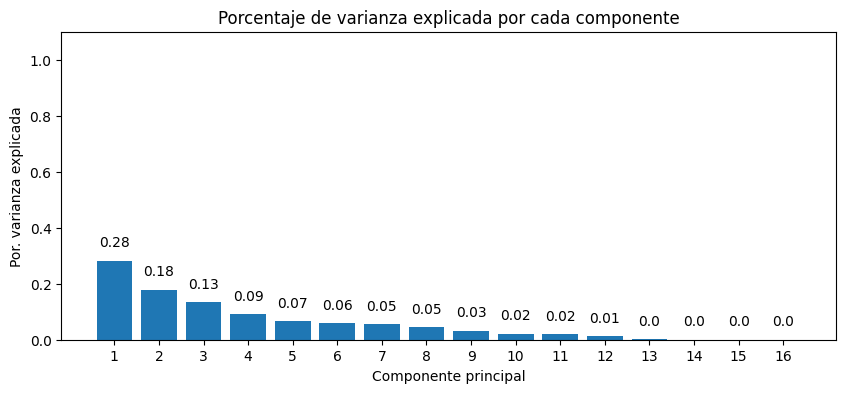

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(X.columns)) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

In [12]:
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
for i,j in enumerate(list(prop_varianza_acum)):
    print("N_componentes:",i+1,"Varianza Acumulada:", round(j,2))

N_componentes: 1 Varianza Acumulada: 0.28
N_componentes: 2 Varianza Acumulada: 0.46
N_componentes: 3 Varianza Acumulada: 0.6
N_componentes: 4 Varianza Acumulada: 0.69
N_componentes: 5 Varianza Acumulada: 0.75
N_componentes: 6 Varianza Acumulada: 0.81
N_componentes: 7 Varianza Acumulada: 0.87
N_componentes: 8 Varianza Acumulada: 0.91
N_componentes: 9 Varianza Acumulada: 0.94
N_componentes: 10 Varianza Acumulada: 0.97
N_componentes: 11 Varianza Acumulada: 0.98
N_componentes: 12 Varianza Acumulada: 1.0
N_componentes: 13 Varianza Acumulada: 1.0
N_componentes: 14 Varianza Acumulada: 1.0
N_componentes: 15 Varianza Acumulada: 1.0
N_componentes: 16 Varianza Acumulada: 1.0


# ¿Y si usamos RandomUnderSampler cambiaría?

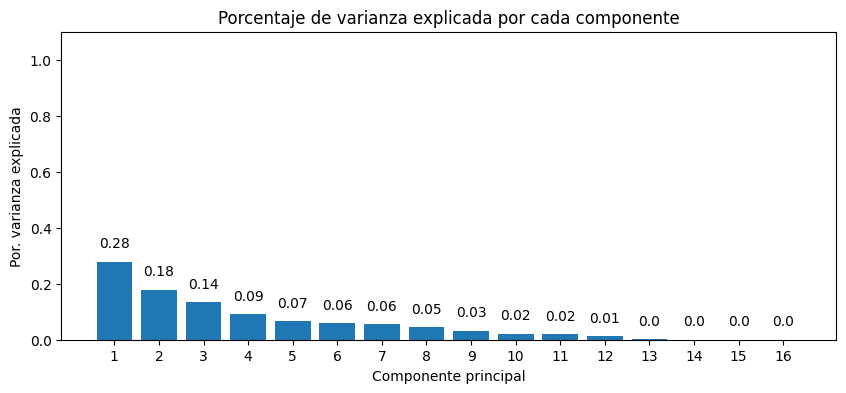

In [22]:
X = df.iloc[:,14:]
y = df['Descargas2']

rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)
pca = PCA(n_components=16)
pca.fit(X_scaled)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(X.columns)) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');